# DV_Final_Project_Part3

Group Name: SSSL

Group Member: Jiaxin Song, Chaohan Shang, Yun Sun, Weihao Li.

In [1]:
%matplotlib inline

In [2]:
import re
import collections
import bqplot
import plotly
import numpy as np
import ipywidgets
import seaborn as sns
import pandas as pd
from bqplot import *
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel("DV_Dataset.xlsx")
data.describe()

,Incident,Date reported,Time reported,Date occurred,Time occurred,General Location,Crime Description,Disposition
count,4607,4607,4607,4607,4607,4607,4607,4607
unique,3841,402,1051,640,927,1296,288,15
top,UU1705578,2017-03-14 00:00:00,0:00,2017-03-03 00:00:00,UNKNOWN,RED LION,UNLAWFUL USE OF I.D.,REPORTED TO OTHER AGENCY
freq,11,124,1929,49,213,281,412,1972
first,NaN,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2018-03-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


Our dataset has 8 columns and 4607 rows. It is about the daliy crime which happens in the university area.

In [4]:
collections.Counter(data["Disposition"])

Counter({'ADMIN CLOSED': 958,
         'ADMIN. CLOSE': 442,
         'ARREST': 545,
         'CLEARED EXCEPT. JUVENILE NO CU': 2,
         'CLEARED EXCEPT. PROS. FAIL TO': 8,
         'CLEARED EXCEPT. REFUSAL TO COO': 4,
         'PENDING': 219,
         'REFERRED TO OTHER JURISDICTION': 5,
         'REPORTED TO OTHER AGENCY': 1972,
         'STUDENT DISC REFERRAL': 222,
         'STUDENT DISCIPLINE': 137,
         'STUDENT DISCIPLINE REFERRAL': 59,
         'UNFOUNDED': 32,
         'WARNING (TRAFFIC)': 1,
         'unk': 1})

In [5]:
# Unify the name of disposition type
data["Disposition"]=data['Disposition'].replace(["ADMIN. CLOSE", "ADMIN CLOSED"], "ADMIN.CLOSED")
data["Disposition"]=data['Disposition'].replace(["STUDENT DISCIPLINE","STUDENT DISC REFERRAL"], "STUDENT DISCIPLINE REFERRAL")
collections.Counter(data["Disposition"])

Counter({'ADMIN.CLOSED': 1400,
         'ARREST': 545,
         'CLEARED EXCEPT. JUVENILE NO CU': 2,
         'CLEARED EXCEPT. PROS. FAIL TO': 8,
         'CLEARED EXCEPT. REFUSAL TO COO': 4,
         'PENDING': 219,
         'REFERRED TO OTHER JURISDICTION': 5,
         'REPORTED TO OTHER AGENCY': 1972,
         'STUDENT DISCIPLINE REFERRAL': 418,
         'UNFOUNDED': 32,
         'WARNING (TRAFFIC)': 1,
         'unk': 1})

The pending case is the 219/4607th of the total case.

In [6]:
Disposition = pd.DataFrame(data['Disposition'].value_counts().reset_index())
Disposition.columns = ['Disposition', 'count']

Text(0.5,0.98,'Dispostion Distribution')

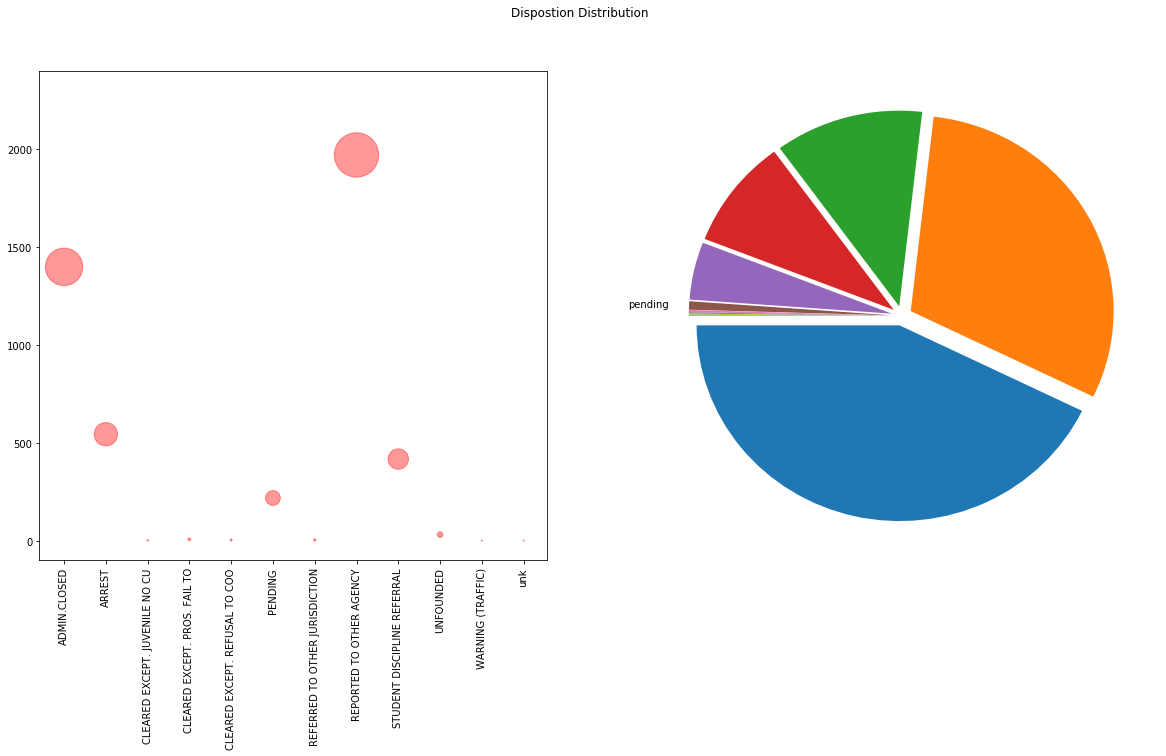

In [7]:
# Use bubble chart and pie chart to see the proportion of pending case in the overall cases.
plt.figure(figsize=(20,9))
plt.subplot(121)
plt.xticks(rotation=90)
plt.ylim(-100,2400)
plt.scatter(Disposition["Disposition"], y = Disposition["count"],s=Disposition["count"]*1,c="red", alpha=0.4)
plt.subplot(122)
fig=plt.pie(Disposition["count"], explode=0.05 * np.ones(12), startangle=180,labels=['','','','','','pending','','','','','',''])[0]
plt.suptitle("Dispostion Distribution")

Compared with other disposition situations, the pending cases only occupie a very small proportion of all cases.
It means that case resolution is more efficient.

# Classify the location into outdoor and indoor location

We use the regex to filter the 'General Location' column and divide it into two categories: Indoor & Outdoor.
In this procedure, we determine if the column contains the following characters: 'ST','DR','AV','AVE','E','N','W','S'.
For those who meet the requirements, we replace the location with 'Outside' and vice versa.

In [8]:
def location_sort(location):
    # We add one column to show the status of each incident.
    status = []
    crime = data["Crime Description"]
    st = r' ST| DR| AV| AVE| E | N | W | S |'
    Outside = 0
    Indoor = 0
    for i in range(len(location)):
        if len(set(re.findall(st,location[i])))==1:
            status.append("Outside")
            Outside +=1
        else:
            Indoor +=1
            status.append("Indoor")
    status = pd.DataFrame(status)
    result = pd.concat([location, crime, status], axis=1)
    result.columns = ['Location','Crime Description','Status']
    return result
In_N_Out = location_sort(data["General Location"])

In [9]:
# Divide the entire dataset into two parts: indoor data and outdoor data.
in_data = []
ot_data = []
for i in range(len(In_N_Out)):
    if In_N_Out['Status'][i] == 'Indoor':
        in_data.append(In_N_Out['Crime Description'][i])
    else:
        ot_data.append(In_N_Out['Crime Description'][i])
in_data = pd.DataFrame({'Crime Description':in_data})
ot_data = pd.DataFrame({'Crime Description':ot_data})

##### Visualize for comparison of different number of indoor or outside
For this visualization, we use the bar chart and pie chart in matplotlib package. After counting the number of indoor and outside, we show the number and percentage of locations. From the pie chart, we can find that outside has the higher probability of crime than indoor.

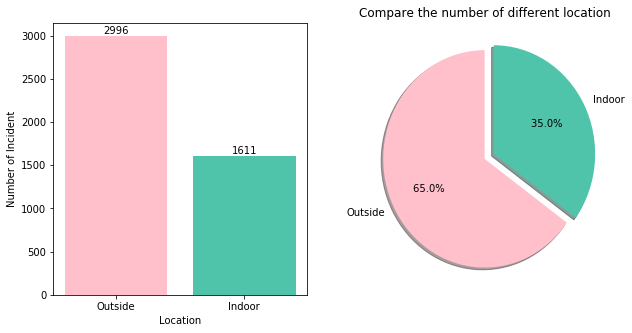

In [10]:
# Check the indoor and outdoor location's proportion with bar chart and pie chart.
outnum = 0
innum = 0
for i in range(len(In_N_Out['Status'])):
    if In_N_Out['Status'][i] == 'Outside':
        outnum += 1
    else:
        innum += 1
name_list = ['Outside','Indoor']  
num_list = [outnum, innum] 

fig=plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1,2,1)
x = range(len(num_list))
y=num_list
color_list=['pink','#4fc4aa']
ax1.bar(x, y,color=color_list,tick_label=name_list)  
ax1.set_xlabel('Location') 
ax1.set_ylabel('Number of Incident') 
for a,b in zip(x,y):
    ax1.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)
ax2 = fig.add_subplot(1,2,2)
labels = 'Outside','Indoor'
fracs = [outnum, innum]
explode = [0,0.1]
ax2.pie(x=fracs, labels=labels, explode=explode,autopct='%3.1f%% ',colors=color_list,
        shadow=True, labeldistance=1.1, startangle = 90,pctdistance = 0.6)
plt.title('Compare the number of different location')
plt.show()

# Classify Crime Description into 9 categories.

By filtering the crime description, we normalize them with regex into 9 types, alcohol related type, property related type, drugs related type,etc. Then, we rename them with standard tags.
We use a function named crime_type_sort to accomplish this complementation. 

In [11]:
# DV for crime types
crime_1 = r'LIQUOR|ALCOHOL'
crime_2 = r'THEFT|FRAUD|STOLEN|ROBBERY|PROPERTY|BURGLARY'
crime_3 = r'DRUGS|CANNABIS|HEROIN'
crime_4 = r'BATTERY|VIOLENCE|FIGHTING'
crime_5 = r'SEX|SEXUAL|RAGE|ASSUALT'
crime_6 = r'HARASSMENT|STALKING'
crime_7 = r'SUICIDE'
crime_8 = r'WEAPON|ARMED|FOID'
crime_9 = r'I.D.'

def crime_type_sort(crime_type):  
    
    alcohol_related = 0
    property_related = 0
    drugs_related = 0
    violence_related = 0
    sexual_related = 0
    harassment_related = 0
    suicide = 0
    weapon_related = 0
    id_related = 0
    
    for i in range(len(crime_type)):
        crime_type[i].upper()
        if len(re.findall(crime_1,crime_type[i])) >= 1:
            alcohol_related +=1
        if len(re.findall(crime_2,crime_type[i])) >= 1:
            property_related +=1
        if len(re.findall(crime_3,crime_type[i])) >= 1:
            drugs_related +=1
        if len(re.findall(crime_4,crime_type[i])) >= 1:
            violence_related +=1
        if len(re.findall(crime_5,crime_type[i])) >= 1:
            sexual_related +=1
        if len(re.findall(crime_6,crime_type[i])) >= 1:
            harassment_related +=1
        if len(re.findall(crime_7,crime_type[i])) >= 1:
            suicide +=1
        if len(re.findall(crime_8,crime_type[i])) >= 1:
            weapon_related +=1
        if len(re.findall(crime_9,crime_type[i])) >= 1:
            id_related +=1
    return(alcohol_related,property_related,drugs_related,
          violence_related,sexual_related,harassment_related,
          suicide,weapon_related,id_related)

##### Visualize for combination of crime types and indoor/outside location
For this visualization, we use stack chart in bqplot package. With the code of crime_type_sort(in_data[]), we can combine the data of crime types and location. From the stack chart, we can find that outside has the higher probability of crime than indoor. And property is the most common crime. When we select one crime type, it will show the number of crime.

In [12]:
#use stack chart to compare the crimes types respect to indoor and outdoor
critypes = ['alcohol','property','drugs','violence','sexual','harassment','suicide','weapon','id']
x_sc = OrdinalScale()
y_sc = LinearScale()
#x_data = np.arange(len(critypes))
y_in = np.array(crime_type_sort(in_data['Crime Description']))
y_out = np.array(crime_type_sort(ot_data['Crime Description']))

def_tt = Tooltip(fields=['y'],labels=['Number'])
bar_chart = Bars(x=critypes, y=[y_in.tolist(),y_out.tolist()], scales= {'x': x_sc, 'y': y_sc},
                 colors=['#6699CC','pink'],
                 labels=['Indoor', 'Outside'],tooltip=def_tt,
                 display_legend=True)

ax_x = Axis(label='Crime Type',scale=x_sc)
ax_y = Axis(label='Number of Crimes',scale=y_sc, orientation='vertical')

Figure(marks=[bar_chart], axes=[ax_x, ax_y],title='Compare the crime types of outside and indoor')

Figure(axes=[Axis(label='Crime Type', scale=OrdinalScale()), Axis(label='Number of Crimes', orientation='vertical', scale=LinearScale())], fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, layout=Layout(min_width='125px'), marks=[Bars(colors=['#6699CC', 'pink'], display_legend=True, interactions={'hover': 'tooltip'}, labels=['Indoor', 'Outside'], scales={'x': OrdinalScale(), 'y': LinearScale()}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}, 'color': {'dimension': 'color'}}, tooltip=Tooltip(fields=['y'], labels=['Number']), tooltip_style={'opacity': 0.9}, x=array(['alcohol', 'property', 'drugs', 'violence', 'sexual', 'harassment',
       'suicide', 'weapon', 'id'], dtype='<U10'), y=array([[177, 550,  85, 127, 115,  18,  36,  19,  18],
       [475, 604, 389, 125, 398, 109,   4,   8, 401]]))], scale_x=LinearScale(allow_padding=False, max=1.0, min=0.0), scale_y=LinearScale(allow_padding=False, max=1.0, min=0.0), title='Compare the crime types of outside and indoor')

# Occurred time VS Crime Numbers

##### Visualize for combination of crime numbers and occured time

In [13]:
# Extract the hour from the occurred time column 
time_occurred=[]
match_type = '\d+(?=:)'
for i in range(len(data["Time occurred"])):
            time_occurred.append(re.findall(match_type,data['Time occurred'][i]))
time_occurred= pd.DataFrame(time_occurred)    
time_crime = pd.concat([time_occurred,data['Crime Description'],data['General Location']], axis=1)
time_crime.columns=["Hour",'Crime Description','General Location']

In [14]:
time_crime=time_crime.dropna(axis=0, how='any').reset_index(level=None,drop=True)

In [15]:
# Analyze the incidents which are reported in one day.
time_series = pd.DataFrame(data['Date reported'].value_counts().reset_index())
time_series.columns = ['date', 'count']
new_ts = time_series.sort_values(by = ['date'])

In [16]:
# Adding default tooltip to Line Chart
x_sc = DateScale()
y_sc = LinearScale()
x_data = new_ts['date']
y_data = new_ts['count']
def_tt = Tooltip(fields = ['color', 'name'], labels = ['Date', 'Count'])
line_chart = Lines(x = x_data, y = y_data, scales = {'x': x_sc, 'y': y_sc}, 
                       tooltip = def_tt, display_legend = True, labels = ["Crime numbers"])
line_chart.colors = ['#66b3ff']
ax_x = Axis(label = 'Date', scale = x_sc, grid_lines='dashed')
ax_y = Axis(label = 'Number', scale = y_sc, orientation = 'vertical')
pz = interacts.PanZoom( scales = {'x': [x_sc], 'y': [y_sc]} )

fig = Figure(title = "Crime numbers per day", marks = [line_chart], axes = [ax_x, ax_y], linestyle = 'solid',
       legend_location='top-right',fig_margin = dict(left=50, right=10, top=50, bottom=50), interaction = pz)
display(fig)

Figure(axes=[Axis(grid_lines='dashed', label='Date', scale=DateScale()), Axis(label='Number', orientation='vertical', scale=LinearScale())], fig_margin={'left': 50, 'right': 10, 'top': 50, 'bottom': 50}, interaction=PanZoom(scales={'x': [DateScale()], 'y': [LinearScale()]}), layout=Layout(min_width='125px'), marks=[Lines(colors=['#66b3ff'], display_legend=True, interactions={'hover': 'tooltip'}, labels=['Crime numbers'], scales={'x': DateScale(), 'y': LinearScale()}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}, 'color': {'dimension': 'color'}}, tooltip=Tooltip(fields=['color', 'name'], labels=['Date', 'Count']), tooltip_style={'opacity': 0.9}, x=array(['2017-01-01T00:00:00.000000000', '2017-01-03T00:00:00.000000000',
       '2017-01-04T00:00:00.000000000', '2017-01-05T00:00:00.000000000',
       '2017-01-08T00:00:00.000000000', '2017-01-09T00:00:00.000000000',
       '2017-01-10T00:00:00.000000000', '2017-01-11T00:00:00.000000000',
       '2017-01-12T00:00:00.000000000', '2017-01-13T00:00:00.000000000',
       '2017-01-14T00:00:00.000000000', '2017-01-15T00:00:00.000000000',
       '2017-01-16T00:00:00.000000000', '2017-01-17T00:00:00.000000000',
       '2017-01-18T00:00:00.000000000', '2017-01-19T00:00:00.000000000',
       '2017-01-20T00:00:00.000000000', '2017-01-21T00:00:00.000000000',
       '2017-01-22T00:00:00.000000000', '2017-01-23T00:00:00.000000000',
       '2017-01-24T00:00:00.000000000', '2017-01-25T00:00:00.000000000',
       '2017-01-26T00:00:00.000000000', '2017-01-27T00:00:00.000000000',
       '2017-01-28T00:00:00.000000000', '2017-01-29T00:00:00.000000000',
       '2017-01-30T00:00:00.000000000', '2017-01-31T00:00:00.000000000',
       '2017-02-01T00:00:00.000000000', '2017-02-02T00:00:00.000000000',
       '2017-02-03T00:00:00.000000000', '2017-02-04T00:00:00.000000000',
       '2017-02-05T00:00:00.000000000', '2017-02-06T00:00:00.000000000',
       '2017-02-07T00:00:00.000000000', '2017-02-08T00:00:00.000000000',
       '2017-02-09T00:00:00.000000000', '2017-02-10T00:00:00.000000000',
       '2017-02-11T00:00:00.000000000', '2017-02-12T00:00:00.000000000',
       '2017-02-13T00:00:00.000000000', '2017-02-14T00:00:00.000000000',
       '2017-02-15T00:00:00.000000000', '2017-02-16T00:00:00.000000000',
       '2017-02-17T00:00:00.000000000', '2017-02-18T00:00:00.000000000',
       '2017-02-19T00:00:00.000000000', '2017-02-20T00:00:00.000000000',
       '2017-02-21T00:00:00.000000000', '2017-02-22T00:00:00.000000000',
       '2017-02-23T00:00:00.000000000', '2017-02-24T00:00:00.000000000',
       '2017-02-25T00:00:00.000000000', '2017-02-26T00:00:00.000000000',
       '2017-02-27T00:00:00.000000000', '2017-02-28T00:00:00.000000000',
       '2017-03-01T00:00:00.000000000', '2017-03-02T00:00:00.000000000',
       '2017-03-03T00:00:00.000000000', '2017-03-04T00:00:00.000000000',
       '2017-03-05T00:00:00.000000000', '2017-03-06T00:00:00.000000000',
       '2017-03-07T00:00:00.000000000', '2017-03-08T00:00:00.000000000',
       '2017-03-09T00:00:00.000000000', '2017-03-10T00:00:00.000000000',
       '2017-03-11T00:00:00.000000000', '2017-03-12T00:00:00.000000000',
       '2017-03-13T00:00:00.000000000', '2017-03-14T00:00:00.000000000',
       '2017-03-15T00:00:00.000000000', '2017-03-16T00:00:00.000000000',
       '2017-03-17T00:00:00.000000000', '2017-03-18T00:00:00.000000000',
       '2017-03-19T00:00:00.000000000', '2017-03-21T00:00:00.000000000',
       '2017-03-23T00:00:00.000000000', '2017-03-25T00:00:00.000000000',
       '2017-03-26T00:00:00.000000000', '2017-03-27T00:00:00.000000000',
       '2017-03-28T00:00:00.000000000', '2017-03-29T00:00:00.000000000',
       '2017-03-30T00:00:00.000000000', '2017-03-31T00:00:00.000000000',
       '2017-04-01T00:00:00.000000000', '2017-04-02T00:00:00.000000000',
       '2017-04-03T00:00:00.000000000', '2017-04-04T00:00:00.000000000',
       '2017-04-05T00:00:00.000000000', '2017-04-06T00:0

We used the regression to normalize the date and hour firstly. This visualization shows the crime numbers per day, we used bqplot to make a line chart. In addition we use the Panzoom to interact that can enlarge the plot. And we can easily find which day occured the most crime incidents.

In [17]:
# Analyze the likelihood of an incident reported in each hour.
hour_series = pd.DataFrame(time_crime['Hour'].value_counts().reset_index())
hour_series.columns = ['hour', 'count']
hour_series["hour"] = hour_series["hour"].astype(int)
hour_series["count"] = hour_series["count"].apply(lambda x: x/439200*100)
new_hs = hour_series.sort_values(by = ['hour'])

In [18]:
x_sc = LinearScale()
y_sc = LinearScale()
x_data = new_hs['hour']
y_data = new_hs['count']
tt = Tooltip(fields = ['x', 'y'], formats=['', '.2f'], labels = ['Hour', 'Percent'])
scatters =Scatter(x = new_hs['hour'], y = new_hs['count'], scales = {'x': x_sc, 'y': y_sc},
                          sizes = 0.5, tooltip = tt, colors = ['green'])

line_chart = Lines(x = x_data, y = y_data, scales = {'x': x_sc, 'y': y_sc}, 
                     display_legend = True, labels = ["Crime distribution in each hour"])
line_chart.colors = ['#33bb33']
ax_x = Axis(label = 'Hour', scale = x_sc, grid_lines='dashed')
ax_y = Axis(label = 'Crime_percent', scale = y_sc, tick_format='0.2f', orientation = 'vertical')
ls = interacts.LassoSelector(scales = {'x': x_sc, 'y': y_sc},
                                   marks = [line_chart])
fig = Figure(title = "Crime numbers per hour", marks = [line_chart, scatters], axes = [ax_x, ax_y], linestyle = 'solid',
       legend_location='top',fig_margin = dict(left=50, right=2, top=50, bottom=50), interaction = ls)
label = ipywidgets.Label()
display(fig, label)

Figure(axes=[Axis(grid_lines='dashed', label='Hour', scale=LinearScale()), Axis(label='Crime_percent', orientation='vertical', scale=LinearScale(), tick_format='0.2f')], fig_margin={'left': 50, 'right': 2, 'top': 50, 'bottom': 50}, interaction=LassoSelector(marks=[Lines(colors=['#33bb33'], display_legend=True, interactions={'hover': 'tooltip'}, labels=['Crime distribution in each hour'], scales={'x': LinearScale(), 'y': LinearScale()}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}, 'color': {'dimension': 'color'}}, tooltip_style={'opacity': 0.9}, x=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23]), y=array([0.12682149, 0.08469945, 0.06147541, 0.02163024, 0.01593807,
       0.00705829, 0.01001821, 0.00751366, 0.02026412, 0.0170765 ,
       0.01593807, 0.02117486, 0.04257741, 0.02140255, 0.03415301,
       0.03210383, 0.03620219, 0.03984517, 0.04690346, 0.03893443,
       0.04417122, 0.05874317, 0.08151184, 0.11384335]))]), layout=Layout(min_width='125px'), legend_location='top', marks=[Lines(colors=['#33bb33'], display_legend=True, interactions={'hover': 'tooltip'}, labels=['Crime distribution in each hour'], scales={'x': LinearScale(), 'y': LinearScale()}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}, 'color': {'dimension': 'color'}}, tooltip_style={'opacity': 0.9}, x=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23]), y=array([0.12682149, 0.08469945, 0.06147541, 0.02163024, 0.01593807,
       0.00705829, 0.01001821, 0.00751366, 0.02026412, 0.0170765 ,
       0.01593807, 0.02117486, 0.04257741, 0.02140255, 0.03415301,
       0.03210383, 0.03620219, 0.03984517, 0.04690346, 0.03893443,
       0.04417122, 0.05874317, 0.08151184, 0.11384335])), Scatter(colors=['green'], interactions={'hover': 'tooltip'}, scales={'x': LinearScale(), 'y': LinearScale()}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}, 'color': {'dimension': 'color'}, 'size': {'dimension': 'size'}, 'opacity': {'dimension': 'opacity'}, 'rotation': {'dimension': 'rotation'}, 'skew': {'dimension': 'skew'}}, tooltip=Tooltip(fields=['x', 'y'], formats=['', '.2f'], labels=['Hour', 'Percent']), tooltip_style={'opacity': 0.9}, x=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23]), y=array([0.12682149, 0.08469945, 0.06147541, 0.02163024, 0.01593807,
       0.00705829, 0.01001821, 0.00751366, 0.02026412, 0.0170765 ,
       0.01593807, 0.02117486, 0.04257741, 0.02140255, 0.03415301,
       0.03210383, 0.03620219, 0.03984517, 0.04690346, 0.03893443,
       0.04417122, 0.05874317, 0.08151184, 0.11384335]))], scale_x=LinearScale(allow_padding=False, max=1.0, min=0.0), scale_y=LinearScale(allow_padding=False, max=1.0, min=0.0), title='Crime numbers per hour')

Label(value='')

Then we used bqplot to combine the line chart and scatter chart to visualize the crime numbers per hour. We calculated the percent of crime incident numbers per hour firstly and used the LassoSelector to help us easily draw something or circle some data in the plot. We found that at 9 PM to 2AM the possibility of crime occured are large than other time.

# Occurred time VS General Location

In [19]:
# Create a new dataframe which includes the time(hour) column and Crime Description.

In [20]:
# Divide the time into three periods.
# period1: 21:00 - 3:00
# period2: 3:00 - 12:00
# period3: 12:00 - 21:00
period1=[]
period2 =[]
period3 =[]
index1 = []
index2 = []
index3 = []
for i in range (len(time_crime['Hour'])):
    if int(time_crime['Hour'][i]) > 21 or int(time_crime['Hour'][i]) <= 3:
                                    period1.append(time_crime['Hour'][i])
                                    index1.append(i)
    if int(time_crime['Hour'][i]) > 3 and int(time_crime['Hour'][i]) <= 12:
                                    period2.append(time_crime['Hour'][i])
                                    index2.append(i)
    if int(time_crime['Hour'][i]) > 12 and int(time_crime['Hour'][i]) <= 21:
                                    period3.append(time_crime['Hour'][i])
                                    index3.append(i)
period1 = pd.DataFrame(period1) 
period2 = pd.DataFrame(period2) 
period3 = pd.DataFrame(period3) 

In [21]:
# Classify the Crime Description repect to the three time periods.
crime1 = []
for i in range(len(index1)):
    crime1.append(time_crime["Crime Description"][i])
crime2 = []
for i in range(len(index2)):
    crime2.append(time_crime["Crime Description"][i])
crime3 = []
for i in range(len(index3)):
    crime3.append(time_crime["Crime Description"][i])
crime1 = pd.DataFrame(crime1) 
crime2 = pd.DataFrame(crime2) 
crime3 = pd.DataFrame(crime3) 

In [22]:
result1 = pd.concat([period1,crime1], axis=1)
result1.columns=["Hour",'Crime Description']
result2 = pd.concat([period2,crime2], axis=1)
result2.columns=["Hour",'Crime Description']
result3 = pd.concat([period3,crime3], axis=1)
result3.columns=["Hour",'Crime Description']

In [23]:
# Use the index of different time periods to filter the location information.
# Obtain the table for the location of the crime for different time periods.

In [24]:
location1 = []
for i in range(len(index1)):
    location1.append(time_crime["General Location"][i])
location2 = []
for i in range(len(index2)):
    location2.append(time_crime["General Location"][i])
location3 = []
for i in range(len(index3)):
    location3.append(time_crime["General Location"][i])
location1 = pd.DataFrame(location1) 
location2 = pd.DataFrame(location2) 
location3 = pd.DataFrame(location3)

In [25]:
time_location1= pd.concat([period1,location1], axis=1)
time_location1.columns=["Hour",'General Location']
time_location2 = pd.concat([period2,location2], axis=1)
time_location2.columns=["Hour",'General Location']
time_location3 = pd.concat([period3,location3], axis=1)
time_location3.columns=["Hour",'General Location']

In [26]:
time_location_count1=pd.DataFrame(time_location1["General Location"].value_counts().reset_index())
time_location_count1.columns = ['General Location', 'Count']
time_location_count2=pd.DataFrame(time_location2["General Location"].value_counts().reset_index())
time_location_count2.columns = ['General Location', 'Count']
time_location_count3=pd.DataFrame(time_location3["General Location"].value_counts().reset_index())
time_location_count3.columns = ['General Location', 'Count']

In [27]:
# Use dropbox with bqplot to see the general Distribution of incident location.
@ipywidgets.interact(time_location = ['period1: 21:00-3:00','period2: 3:00-12:00','period3: 12:00-21:00'],)
def print_bandname(time_location):
    
    x_sc = bqplot.OrdinalScale()
    y_sc = bqplot.LinearScale()

    x_ax = bqplot.Axis(scale = x_sc, label = 'General Location')
    y_ax = bqplot.Axis(scale = y_sc, label = 'Count', orientation = 'vertical')
    tt = bqplot.Tooltip(fields = ["x","y"], labels=["General Location","Crimes"])
    label = ipywidgets.Label()
    
    if time_location=='period1: 21:00-3:00':
        scatters = bqplot.Scatter(x = time_location_count1["General Location"],
                          y=time_location_count1["Count"], scales = {'x': x_sc, 'y': y_sc},
                          tooltip = tt, colors=['dodgerblue'])
        fig = bqplot.Figure(marks = [scatters], axes = [y_ax], title='Crime Number for All Locations',interaction = None)
        display(fig, label);
        
    if time_location=='period2: 3:00-12:00':
        scatters = bqplot.Scatter(x = time_location_count2["General Location"],
                          y=time_location_count2["Count"], scales = {'x': x_sc, 'y': y_sc},
                          tooltip = tt, colors=['dodgerblue'])
        fig = bqplot.Figure(marks = [scatters], axes = [y_ax],title='Crime Number for All Locations', interaction = None)
        display(fig, label);
        
    if time_location=='period3: 12:00-21:00':
        scatters = bqplot.Scatter(x = time_location_count3["General Location"],
                          y=time_location_count3["Count"], scales = {'x': x_sc, 'y': y_sc},
                          tooltip = tt, colors=['dodgerblue'])
        fig = bqplot.Figure(marks = [scatters], axes = [y_ax], title='Crime Number for All Locations',interaction = None)
        display(fig, label);
    

interactive(children=(Dropdown(description='time_location', options=('period1: 21:00-3:00', 'period2: 3:00-12:00', 'period3: 12:00-21:00'), value='period1: 21:00-3:00'), Output()), _dom_classes=('widget-interact',))

Use dropbox to choose different time period, the highest point of the three figures all is the red lion. Whether the time is morning or evening. And the second highest point of two figures is SDRP, which is the Student Dining and Residential Programs Building. And it is worth noting that, for the time from 3am to 12 pm, the ILLINI UNION BOOKSTORE is the second highest point. That is, there are cases that occur very often in that place in the morning. It is necessary to pay attention to safety.

# Top 10 dangerous buildings respect to various time periods.

In [28]:
# Use most_common function to see the top10 building location.
Location = collections.Counter(data["General Location"])
Location.most_common(5)

[('RED LION', 281),
 ('UNKNOWN LOCATION', 87),
 ('SDRP', 81),
 ('ILLINI UNION BOOKSTORE', 70),
 ("JOE'S BREWERY", 62)]

In [29]:
#common location top10 (building)
#common location: RED LION, SDRP, ILLINI UNION BOOKSTORE, JOE'S BREWERY, KAMS
#               ILLINI UNION, CLYBOURNE, ALLEN RESIDENCE HALL, OGLESBY RESIDENCE HALL, WESTON RESIDENCE HALL

In [30]:
# Demonstrate the number of incidents in each time period regarding Top10 most common location.

In [31]:
t_l_index1=[]
t_l_index2=[]
t_l_index3=[]
common_location = ['RED LION','SDRP','ILLINI UNION BOOKSTORE',"JOE'S BREWERY",'KAMS','ILLINI UNION','CLYBOURNE','ALLEN RESIDENCE HALL',
                  'OGLESBY RESIDENCE HALL','WESTON RESIDENCE HALL']

for location in range(len(common_location)):
    for i in range(len(time_location1)):
        if time_location1["General Location"][i] == common_location[location]:
            t_l_index1.append(i)
    for i in range(len(time_location2)):
        if time_location2["General Location"][i] == common_location[location]:
            t_l_index2.append(i)
    for i in range(len(time_location3)):
        if time_location3["General Location"][i] == common_location[location]:
            t_l_index3.append(i)
t_l_index1.sort()
t_l_index2.sort()
t_l_index3.sort()

In [32]:
top_time_location1=time_location1.iloc[t_l_index1]
top_time_location2=time_location2.iloc[t_l_index2]
top_time_location3=time_location3.iloc[t_l_index3]

In [33]:
# Use ipwidgets and dropbox to implement the interaction for the number of incidents 
# in each most common buildings vs three time periods.

In [34]:
@ipywidgets.interact(time_period = ['period1: 21:00-3:00','period2: 3:00-12:00','period3: 12:00-21:00'])
def print_bandname(time_period):
    if time_period=='period1: 21:00-3:00':
        sns.countplot(y="General Location", data=top_time_location1)
    if time_period=='period2: 3:00-12:00':
        sns.countplot(y="General Location", data=top_time_location2)
    if time_period=='period3: 12:00-21:00':
        sns.countplot(y="General Location", data=top_time_location3)
    plt.title('Top 10 dangerous public buildings in the University Area(Location vs. Crime Number )')

interactive(children=(Dropdown(description='time_period', options=('period1: 21:00-3:00', 'period2: 3:00-12:00', 'period3: 12:00-21:00'), value='period1: 21:00-3:00'), Output()), _dom_classes=('widget-interact',))

From the plot, we can see the RED LION is the most unsafe place in a day.
In the top 10 buildings, there are four bars, four residence hall and two social buildings.
From 9pm to 3am, bar is the most common place for the crimes.
From 3am to 12pm, social buildings and residence hall often occurs case. The bar is relatively safe, but the RED LION is a special case.
From 12pm to 9pm, in addition to the RED LION, the safety of other buildings is similar.

# The relation between numbers of crimes and different times. 

In [35]:
period1_count=pd.DataFrame(result1["Hour"].value_counts().reset_index())
period1_count.columns = ['Hour', 'Count of Crime']
period2_count=pd.DataFrame(result2["Hour"].value_counts().reset_index())
period2_count.columns = ['Hour', 'Count of Crime']
period3_count=pd.DataFrame(result3["Hour"].value_counts().reset_index())
period3_count.columns = ['Hour', 'Count of Crime']

Text(0.5,0,'Hour')

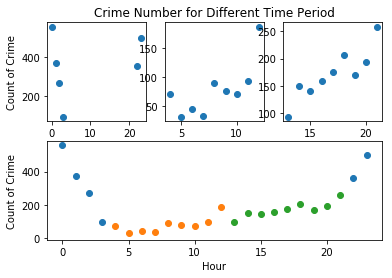

In [36]:
plt.subplot(231)
plt.scatter(period1_count["Hour"].astype(int),period1_count["Count of Crime"]) 
plt.ylabel('Count of Crime')
plt.subplot(232)
plt.scatter(period2_count["Hour"].astype(int),period2_count["Count of Crime"]) 
plt.title('Crime Number for Different Time Period')
plt.subplot(233)
plt.scatter(period3_count["Hour"].astype(int),period3_count["Count of Crime"])
plt.subplot(212)
plt.scatter(period1_count["Hour"].astype(int),period1_count["Count of Crime"]) 
plt.scatter(period2_count["Hour"].astype(int),period2_count["Count of Crime"])
plt.scatter(period3_count["Hour"].astype(int),period3_count["Count of Crime"]) 
plt.ylabel('Count of Crime')
plt.xlabel('Hour')

The overall trend is that the closer the evening and early morning, the more crime.
The crime is the least at 5 o'clock in the morning 

# Crime types in various time periods

This is a visualization of the number of incidents regarding the crime categories.

In [37]:
Morning = crime_type_sort(result1["Crime Description"])
Afternoon = crime_type_sort(result2["Crime Description"])
Night = crime_type_sort(result3["Crime Description"])

In [38]:
crime_cpy = time_crime
for i in range(len(crime_cpy['Crime Description'])):
    if len(re.findall(crime_1,crime_cpy['Crime Description'][i])) >= 1:
        crime_cpy['Crime Description'][i] = 'alcohol_related'
    if len(re.findall(crime_2,crime_cpy['Crime Description'][i])) >= 1:
        crime_cpy['Crime Description'][i] = 'property_related'
    if len(re.findall(crime_3,crime_cpy['Crime Description'][i])) >= 1:
        crime_cpy['Crime Description'][i] = 'drugs_related'
    if len(re.findall(crime_4,crime_cpy['Crime Description'][i])) >= 1:
        crime_cpy['Crime Description'][i] = 'violence_related'
    if len(re.findall(crime_5,crime_cpy['Crime Description'][i])) >= 1:
        crime_cpy['Crime Description'][i] = 'sexual_related'
    if len(re.findall(crime_6,crime_cpy['Crime Description'][i])) >= 1:
        crime_cpy['Crime Description'][i] = 'harassment_related'
    if len(re.findall(crime_7,crime_cpy['Crime Description'][i])) >= 1:
        crime_cpy['Crime Description'][i] = 'suicide'
    if len(re.findall(crime_8,crime_cpy['Crime Description'][i])) >= 1:
        crime_cpy['Crime Description'][i] = 'weapon_related'
    if len(re.findall(crime_9,crime_cpy['Crime Description'][i])) >= 1:
        crime_cpy['Crime Description'][i] = 'id_related'

In [39]:
crime_type = ['alcohol_related','property_related','drugs_related',
              'violence_related','sexual_related','harassment_related',
              'suicide','weapon_related','id_related']
colors = ['#e6194b','#3cb44b','#ffe119','#0082c8','#f58231',
         '#911eb4','#46f0f0','#f032e6','#ffd8b1']
explode = (0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02)

In [40]:
@ipywidgets.interact(
                    Time = ['Morning 3:00 - 12:00', 
                             'Afternoon 12:00 - 21:00', 
                             'Night 21:00 - 3:00'])
def print_bar_plot(Time):
    if Time == 'Morning 3:00 - 12:00':
        y_data = Morning
    if Time == 'Afternoon 12:00 - 21:00':
        y_data = Afternoon
    if Time == 'Night 21:00 - 3:00': 
        y_data = Night
        
    x_sc = OrdinalScale()
    y_sc = LinearScale()
    x_data = crime_type
    
    bar_chart = Bars(x = x_data, y = y_data, 
                     interactions={'click': 'select','hover': 'tooltip',},
                     unselected_style = {"opacity": "0.5"},
                     selected_style = {"opacity": "1",'fill': '#ffd8b1'},
                     scales={'x': x_sc, 'y': y_sc})
    ax_x = Axis(scale=x_sc)
    ax_y = Axis(scale=y_sc, orientation='vertical')

    def_tt = Tooltip(fields=['x', 'y'], formats=['', 'd'])
    bar_chart.tooltip=def_tt
    fig = Figure(marks=[bar_chart],axes = [ax_y],title='Frenquency of crimes in different time')
    display(fig)

interactive(children=(Dropdown(description='Time', options=('Morning 3:00 - 12:00', 'Afternoon 12:00 - 21:00', 'Night 21:00 - 3:00'), value='Morning 3:00 - 12:00'), Output()), _dom_classes=('widget-interact',))

The data visualization above demonstrated the number of incidents that occured in the most common propertities. In this visualization, Ipywidget dropbox was applied in the time selection. Also this figure was equipped with other user interactive capabilities such as hover tooltip and selecting. By moving the cursor in the certain area, the detail information(crime categories and count) would appear and by clicking the bar shown in the figure, the color would be changed for better recognition.

This is a visualization of the components of the crime types in different time periods.

In [41]:
@ipywidgets.interact(Time = ['Morning 3:00 - 12:00', 
                             'Afternoon 12:00 - 21:00', 
                             'Night 21:00 - 3:00'])
def print_pie_chart(Time): 
    if Time == 'Morning 3:00 - 12:00':
        pie_data = np.array(Morning)/sum(Morning)
    if Time == 'Afternoon 12:00 - 21:00':
        pie_data = np.array(Afternoon)/sum(Afternoon)
    if Time == 'Night 21:00 - 3:00':
        pie_data = np.array(Night)/sum(Night)
#     pie_data = Morning
    sc = ColorScale(scheme='Reds')
    tooltip_widget = Tooltip(fields=['size'], formats=['0.2f'])
    pie = Pie(sizes = pie_data,display_labels='outside',  color = np.random.randn(9), 
              tooltip = tooltip_widget, interactions = {'click': 'tooltip'}, 
              selected_style = {'fill': 'red'})

    pie.selected_style = {"opacity": "1", "stroke": "white", "stroke-width": "2"}
    pie.unselected_style = {"opacity": "0.4"}
    pie.interactions = {'click': 'select', 'hover': 'tooltip'}
    pie.labels = list(crime_type)
    fig = Figure(marks=[pie],title='Incident distribution in different time')
    display(fig)

interactive(children=(Dropdown(description='Time', options=('Morning 3:00 - 12:00', 'Afternoon 12:00 - 21:00', 'Night 21:00 - 3:00'), value='Morning 3:00 - 12:00'), Output()), _dom_classes=('widget-interact',))

The visualization above is backed up with Bqplot, ipywidget packages. From the dropbox, three different time periods could be seleted. After selecting the target time period, the distrbution of crimes would be shown in the pie chart, the size of the area represented the proportion of each crime categories. Note that interaction such as 'hover' and 'selecting' were applied in this plotting.

# Dangerous location map

In [42]:
import plotly.plotly as py
from plotly.graph_objs import *
plotly.tools.set_credentials_file(username='Jiaxins2', api_key='WEsQb8U99ZjFhm515YU0')
mapbox_access_token = 'pk.eyJ1IjoiY2hhb2hhbnNoYW5nIiwiYSI6ImNqZ21kcHZtcjAwbXIzMm8zcWo0dXhtdHAifQ.lb2gdvCkcLPqk5JykhY9Fg'

In [43]:
mapdata = pd.DataFrame(Location.most_common(),columns = ['Location','Count']).head(10)
mapdata['lat'] = ['40.1100049','0','40.10393699999999',
             '40.108267','40.109713',
             '40.1080694','40.1092101','0',
             '40.109711','40.1041097']
mapdata['lon'] = ['-88.23565919999999','0','-88.235277',
             '-88.2292304','-88.23178289999998',
             '-88.22953769999998','-88.22722249999998','0',
             '-88.230235','-88.22085049999998']
data = Data([
    Scattermapbox(
        lat=list(mapdata['lat']),
        lon= list(mapdata['lon']),
        mode='markers',
        marker=Marker(
            color = mapdata['Count'] ** 0.5,
            colorscale = 'Picnic',
            size= (mapdata['Count']**0.5 * 2),
            showscale= True
        ),
        text=list(mapdata['Count']),
    )
])
layout = Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=40.108267,
            lon=-88.2292304
        ),
        pitch=0,
        zoom=14
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Multiple Mapbox')

In this visualization, the Plotly and mapbox pacakges were used and the map was supported by Google. This visualization demonstrated the count of incidents which was based on the size. Also, the colorscale was used to help understanding the scale. Since our data was not as large as others, there were only few dots shown in the graph. Note that there was also interaction on the hover. When moving the cursor to the certain dot, the number of incidents would be shown.